## Bilateral Connections in Networks

A network is represented by an $n \times n$ adjacency matrix $A$ with elements $a_{ij}$. I consider a directed, weighted, and possibly signed network, which means that $a_{ij} \in [-1,1]$ shows the sign and strength of the link from cross-sectional unit $i$ to unit $j$, with $a_{ij} \neq a_{ji}$ possibly. If $a_{ij} = 0$, I say unit $i$ is not connected to unit $j$. Self-links $a_{ii} \neq 0$ are permitted. The set of bilateral links $\{a_{ij}\}_{i,j=1:n}$ give rise to a plethora of higher-order connections among units, referred to as walks.

### Definition: Walk

A walk from $i$ to $j$ of length $K$ is the product of a sequence of $K$ links $a_{i_k,i_{k+1}}$ between units $i_1, i_2, \ldots, i_{K - 1}$ such that $a_{i_k,i_{k+1}} \neq 0$ for $k = 1 : K - 2$, with $i_1 = i$, $i_{K - 1} = j$:

$$a_{i,i_2,\ldots,i_{K-2},j} = \prod_{k=1}^{K-2} a_{i_k, i_{k+1}}.$$

Put simply, a walk is the product of bilateral links $a_{ij}$ that lead from unit $i$ to unit $j$ over some intermediary units, all of which are sequentially connected. Just as element $(i, j)$ in the matrix $A$ shows the walk from $i$ to $j$ of length one (direct link), simple matrix algebra reveals that $(A^K)_{ij}$ contains the sum of walks from $i$ to $j$ of length $K$. I refer to this quantity as the $K$th-order connection from $i$ to $j$.

### Example

Consider the following example:

$$
A = \begin{bmatrix} 0 & 0 & 0.8 \\ 0.7 & 0 & 0.2 \\ 0 & 0.9 & 0 \end{bmatrix}, \quad A^2 = \begin{bmatrix} 0 & 0.72 & 0 \\ 0 & 0.18 & 0.56 \\ 0.63 & 0 & 0.18 \end{bmatrix}, \quad A^3 = \begin{bmatrix} 0.50 & 0 & 0.14 \\ 0.13 & 0.50 & 0.04 \\ 0 & 0.16 & 0.50 \end{bmatrix}.
$$

Even though unit 3 is not directly connected to unit 1 ($a_{31} = 0$), there exists a second-order connection via unit 2 ($a_{32}a_{21} \neq 0$). For example, in a production network, unit 1 could be a supplier to unit 2, who in turn is a supplier to unit 3.

## Lagged Innovation Transmission via Bilateral Links

The core assumption that underlies the proposed NVAR is that innovations $u_{it}$ to a process $y_{it}$ transmit cross-sectionally only via bilateral links. I assume that links are fixed and this transmission operates only in one direction through the network; the direct link from $i$ to $j$, $a_{ij}$, transmits innovations from $j$ to $i$. Innovations can be cross-sectionally correlated. To simplify the exposition, I assume $\mathbb{E}[y_{it}] = 0 \; \forall \; i, t$.

### Single Lag in Innovation Transmission: NVAR(1,1)

Consider the following VAR(1) for the cross-sectional time series $y_t = (y_{1t}, \ldots, y_{nt})'$:

$$
y_t = \Phi y_{t-1} + u_t, \quad u_t \sim WN(0, \Sigma), \quad \text{with} \quad \Phi = \alpha A, \quad \alpha \in \mathbb{R}.
$$

If $\Phi$ is proportional to an adjacency matrix $A$ containing cross-sectional linkages, one obtains a process that relates the dynamics of the cross-sectional time series $y_t$ to the bilateral links among cross-sectional units. Following Long and Plosser (1983), in Section 4 I derive such a process for sectoral output and prices in an RBC production economy with a one-period delay in converting inputs into output. Golub and Jackson (2010) posit it to study societal opinion formation through friendship ties.

Under this process, the one period-ahead expectation of $y_{it}$ is proportional to a weighted sum of one-period lagged values of $y_{jt}$ for all units $j$ to which $i$ is directly linked, with weights given by the strength of direct links $a_{ij}$. 

$$
\mathbb{E}_{t-1}[y_{it}] = \alpha \sum_{j=1}^{n} a_{ij}y_{jt-1}.
$$

For example, in Long and Plosser (1983), the expected output tomorrow in sector $i$ is a weighted average of the production in its supplier-sectors $j$ today. Dynamics of $y_t$, as summarized by Granger-causality at horizons $h = 1, 2, \ldots$, are shaped by $h$th order network-connections:

$$
GC_{ij}^{h} \equiv \frac{\partial y_{i,t+h}}{\partial y_{jt}} = \frac{\partial y_{i,t+h}}{\partial u_{jt}} = \left[ \alpha^h A^h \right]_{ij}.
$$

As a result, given all other variables $y_k$, $k \neq j$, $y_j$ is useful in forecasting $y_i$ at horizon $h$ iff there is an $h$th order connection from $i$ to $j$. $GC_{ij}^h$ is also referred to as the Generalized Impulse Response Function (GIRF).


Estimation α: 0.8876 (True: 0.9)

 Matrix GIRF Example (h=3):
[[0.35242282 0.         0.10069223]
 [0.0881057  0.35242282 0.02517306]
 [0.         0.11327876 0.35242282]]


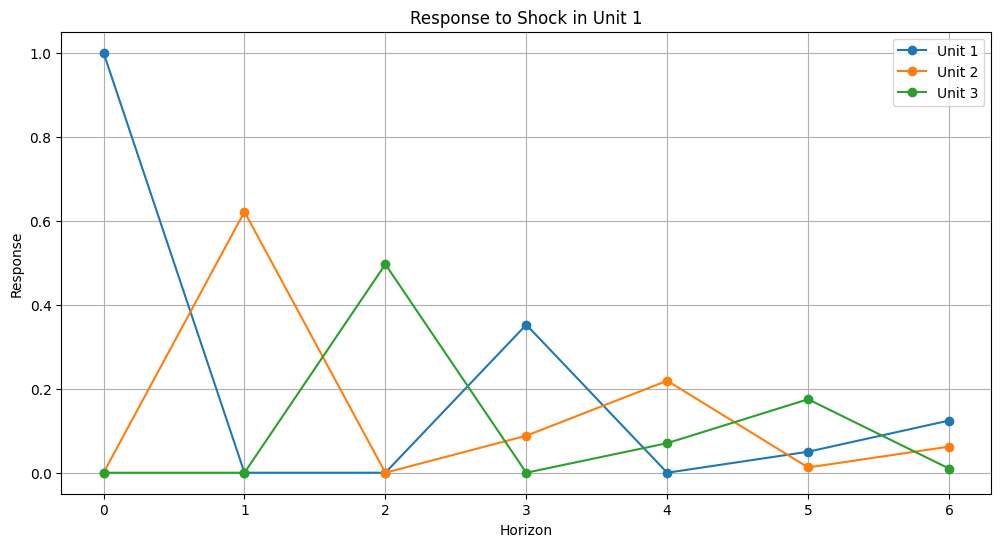

In [4]:
"""
@author: fawdywahyu
"""

import numpy as np
import matplotlib.pyplot as plt

# ========================
# 1. SIMULASI DATA NVAR(1,1)
# ========================

def simulate_nvar(A, alpha, T=100, sigma_u=0.1, seed=None):
    """
    Simulasi data dari model NVAR(1,1)
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan (n x n)
        alpha (float): Parameter autoregressive
        T (int): Jangka waktu
        sigma_u (float): Standar deviasi inovasi
        seed (int): Seed untuk random generator
        
    Returns:
        np.ndarray: Data simulasi (T x n)
    """
    if seed is not None:
        np.random.seed(seed)
    
    n = A.shape[0]
    y = np.zeros((T, n))
    u = np.random.normal(0, sigma_u, (T, n))
    
    for t in range(1, T):
        y[t] = alpha * A @ y[t-1] + u[t]
    
    return y

# ========================
# 2. ESTIMASI PARAMETER α
# ========================

def estimate_alpha(A, Y):
    """
    Estimasi parameter α menggunakan OLS
    
    Parameters:
        A (np.ndarray): Matriks adjacency jaringan
        Y (np.ndarray): Data time series (T x n)
        
    Returns:
        float: Estimasi α
    """
    Y_lag = Y[:-1]  # y_{t-1}
    Y_current = Y[1:]  # y_t
    
    # Reshape data ke bentuk vektor
    X = (A @ Y_lag.T).T.ravel()  # A @ y_{t-1} untuk semua t
    y = Y_current.ravel()
    
    # OLS: y = α * X + ε
    alpha = np.linalg.lstsq(X[:, np.newaxis], y, rcond=None)[0][0]
    
    return alpha

# ==================================
# 3. FUNGSI IMPULSE RESPONSE (GIRF)
# ==================================

def compute_girf(A, alpha, h_max):
    """
    Menghitung Generalized Impulse Response Function
    
    Parameters:
        A (np.ndarray): Matriks adjacency
        alpha (float): Parameter autoregressive
        h_max (int): Horizon maksimum
        
    Returns:
        list: List matriks respons untuk h=0 sampai h_max
    """
    n = A.shape[0]
    girf = []
    
    # Inisialisasi dengan matriks identitas (h=0)
    current_matrix = np.eye(n)
    girf.append(current_matrix.copy())
    
    for h in range(1, h_max+1):
        current_matrix = (alpha ** h) * np.linalg.matrix_power(A, h)
        girf.append(current_matrix)
    
    return girf

# ====================
# 4. CONTOH JARINGAN
# ====================

def example_network():
    """Jaringan contoh dari paper (Section 2.1)"""
    return np.array([
        [0.0, 0.0, 0.8],
        [0.7, 0.0, 0.2],
        [0.0, 0.9, 0.0]
    ])

# ====================
# 5. VISUALISASI GIRF
# ====================

def plot_girf(girf, shock_unit=0, h_max=6):
    """
    Plot impulse response untuk unit tertentu
    
    Parameters:
        girf (list): List matriks GIRF
        shock_unit (int): Indeks unit yang menerima shock
        h_max (int): Horizon maksimum
    """
    n = girf[0].shape[0]
    horizons = list(range(h_max + 1))
    
    plt.figure(figsize=(12, 6))
    for i in range(n):
        responses = [girf[h][i, shock_unit] for h in range(h_max + 1)]
        plt.plot(horizons, responses, marker='o', label=f'Unit {i+1}')
    
    plt.title(f'Response to Shock in Unit {shock_unit+1}')
    plt.xlabel('Horizon')
    plt.ylabel('Response')
    plt.xticks(horizons)
    plt.legend()
    plt.grid(True)
    plt.show()

# ==========================
# 6. DEMO DENGAN CONTOH PAPER
# ==========================

# Parameter contoh
A = example_network()
alpha_true = 0.9
h_max = 6

# Simulasi data
Y = simulate_nvar(A, alpha_true, T=1000, sigma_u=0.1, seed=42)

# Estimasi α
alpha_est = estimate_alpha(A, Y)
print(f"Estimation α: {alpha_est:.4f} (True: {alpha_true})")

# Hitung GIRF
girf = compute_girf(A, alpha_est, h_max)

# Cetak matriks GIRF untuk beberapa horizon
print("\n Matrix GIRF Example (h=3):")
print(girf[3])

# Plot respons untuk shock di Unit 1
plot_girf(girf, shock_unit=0, h_max=h_max)


### Multiple Lags in Innovation Transmission: NVAR(p,1)

Let the cross-sectional time series $\tilde{y}_t$ evolve according to

$$
\tilde{y}_t = \alpha_1 A \tilde{y}_{t-1} + \ldots + \alpha_p A \tilde{y}_{t-p} + \tilde{u}_t, \quad \tilde{u}_t \sim WN(0, \Sigma), \tag{2}
$$

with $\alpha = (\alpha_1, \ldots, \alpha_p)' \in \mathbb{R}^p$. This is a VAR(p) where each autoregressive matrix is proportional to the same network adjacency matrix $A$. It is a particular version of the network-autoregressive process in Zhu et al. (2017). I dub this process NVAR(p,1). Compared to Eq. (1), setting $p > 1$ allows connections of order lower than $h$ to affect dynamics at horizon $h$.

#### Proposition: Granger-Causality in NVAR(p,1)
Let $\tilde{y}_t$ evolve as in Eq. (2). Assuming $\alpha_l \neq 0 \; \forall \; l$, $\tilde{y}_j$ Granger-causes $\tilde{y}_i$ at horizon $h$ if there exists a connection from $i$ to $j$ of at least one order $k \in \{k, k+1, \ldots, h\}$, where $k = \text{ceil}(h/p)$.

The proof in Appendix A.1 establishes that the GIRF is of the form

$$
\frac{\partial \tilde{y}_{i,t+h}}{\partial \tilde{u}_{j,\tau}} = c_k^{h}(\alpha) \left[A^k\right]_{ij} + \ldots + c_n^{h}(\alpha) \left[A^h\right]_{ij}. \tag{3}
$$

The coefficients $\{c_k^{h}(\alpha)\}_{k=k,h}$ are polynomials of $\{\alpha_l\}_{l=1:p}$ and show the importance of different connection-orders $k$ for the impulse response at a given horizon $h$. For a pair $(i, j)$ with only a direct link – $a_{ij} \neq 0$ and $(A^k)_{ij} = 0$ for $k > 1$ –, this boils down to

$$
\frac{\partial \tilde{y}_{i,t+h}}{\partial \tilde{u}_{j,\tau}} = \alpha h a_{ij}
$$

for $h = 1 : p$ and zero otherwise. Hence, Eq. (2) specifies that $\tilde{y}_t$ is driven by lagged network interactions, whereby innovation transmission along a bilateral link takes $p$ periods to fully materialize. The parameters $\{\alpha_l\}_{l=1:p}$ determine how this transmission materializes over time and, consequently, how transmission along higher-order connections accumulates as time progresses. Note that the transmission is assumed to be the same for all unit pairs $(i, j)$ and invariant over time.

The process $\tilde{y}_t$ evolves at frequency $\tau$, which I shall call the network interaction frequency. It might not coincide with the frequency of observation. In particular, if data is observed at a lower frequency than network interactions occur – as is likely the case for macroeconomic series –, then dynamics at horizon $h$ can be driven by connections of order higher than $h$, as several rounds of transmission can happen in one period of observation. In addition, this leads to network-induced cross-sectional correlation in observed innovations even in absence of correlation in $\tilde{u}_\tau$. In the following, I formalize this idea. Let the observed data be $\{y_t\}_{t=1:T}$ and assume $\tilde{u}_\tau \sim N(0, \Sigma)$.


Parameter True: [0.6, 0.3]
Parameter Estimated: [0.597 0.277]


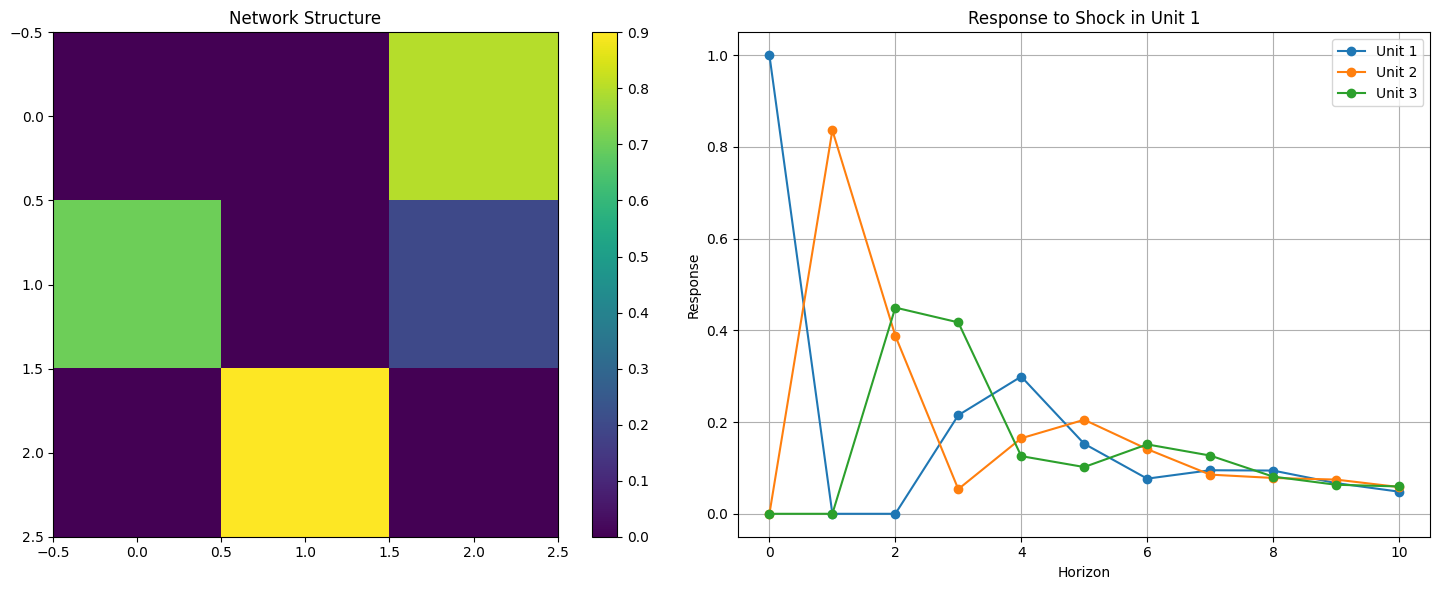


Granger-causality Matrix for Horizon 3:
[[1 1 1]
 [1 1 1]
 [1 1 1]]


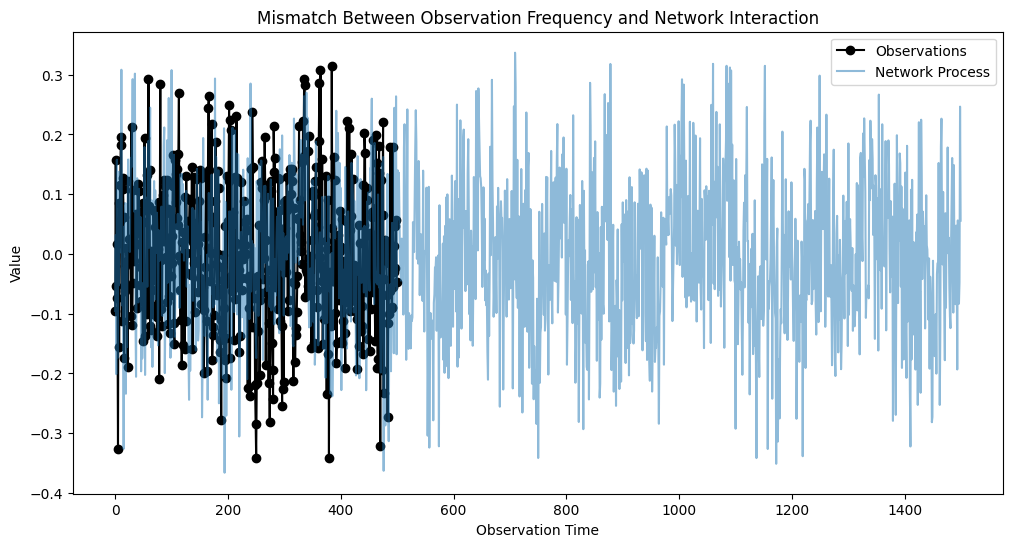

In [7]:
from scipy.linalg import toeplitz

# ============================================
# 1. FUNGSI SIMULASI UNTUK NVAR(p,1) - DIPERBARUI
# ============================================

def simulate_nvar_p(A, alphas, T=100, sigma_u=0.1, burn_in=100, seed=None):
    """
    Simulasi model NVAR(p,1) dengan periode burn-in
    
    Parameters:
        A (np.ndarray): Matriks adjacency (n x n)
        alphas (list): Koefisien [α1, α2, ..., αp]
        T (int): Jumlah observasi
        sigma_u (float): Standar deviasi inovasi
        burn_in (int): Periode burn-in untuk stabilisasi
        seed (int): Seed untuk generator acak
    """
    np.random.seed(seed)
    p = len(alphas)
    n = A.shape[0]
    total_T = T + burn_in
    y = np.zeros((total_T, n))
    u = np.random.normal(0, sigma_u, (total_T, n))
    
    # Inisialisasi dengan nilai acak
    y[:p] = np.random.normal(0, 0.1, (p, n))
    
    for t in range(p, total_T):
        y[t] = sum(alphas[l] * (A @ y[t-l-1]) for l in range(p)) + u[t]
    
    return y[burn_in:]

# ============================================
# 2. ESTIMASI PARAMETER DENGAN OLS - DIPERBARUI
# ============================================

def estimate_alphas(A, Y, p):
    """
    Corrected estimation function with proper dimension handling
    
    Parameters:
        A (np.ndarray): Matriks adjacency (n x n)
        Y (np.ndarray): Data time series (T x n)
        p (int): Orde lag
        
    Returns:
        np.ndarray: Estimasi parameter [α1, ..., αp]
    """
    T, n = Y.shape
    X = np.zeros(((T-p)*n, p))  # Mengubah dimensi X
    y = Y[p:].ravel()           # Target dalam bentuk vektor
    
    # Membangun matriks desain dengan benar
    for l in range(p):
        # Hitung A @ Y untuk setiap lag
        AY = (A @ Y[p-l-1:T-l-1].T).T
        X[:, l] = AY.ravel()    # Assign ke kolom yang sesuai
        
    # Ridge regression untuk stabilitas
    alphas = np.linalg.lstsq(X.T @ X + 1e-6*np.eye(p), X.T @ y, rcond=None)[0]
    
    return alphas
# ============================================
# 3. IMPULSE RESPONSE FUNCTION - DIPERBARUI
# ============================================

def compute_girf_p(A, alphas, h_max=20):
    """
    Corrected implementation of GIRF computation for NVAR(p,1)
    
    Parameters:
        A (np.ndarray): Adjacency matrix (n x n)
        alphas (list): Coefficients [α1, α2, ..., αp]
        h_max (int): Maximum horizon
        
    Returns:
        list: List of GIRF matrices for h=0 to h_max
    """
    p = len(alphas)
    n = A.shape[0]
    girf = [np.eye(n)]  # h=0 (identity matrix)
    
    # Precompute all required powers of A
    A_powers = [np.eye(n)]  # A^0
    for k in range(1, h_max+1):
        A_powers.append(A @ A_powers[-1])
    
    # Compute GIRF recursively
    for h in range(1, h_max+1):
        current = np.zeros((n, n))
        
        # Case 1: Direct effect from current period
        if h <= p:
            current += alphas[h-1] * A
        
        # Case 2: Effects propagating through previous periods
        for m in range(1, min(p, h)+1):
            if h-m >= 0:
                current += alphas[m-1] * (A @ girf[h-m])
        
        girf.append(current)
    
    return girf
# ============================================
# 4. FREKUENSI OBSERVASI vs INTERAKSI JARINGAN
# ============================================

def simulate_frequency_mismatch(A, alphas, obs_ratio=2, T=100, seed=None):
    """
    Simulasi ketidaksesuaian frekuensi antara interaksi jaringan dan observasi
    
    obs_ratio: Rasio frekuensi jaringan terhadap observasi (misal 2 = 2 interaksi jaringan per 1 observasi)
    """
    np.random.seed(seed)
    p = len(alphas)
    n = A.shape[0]
    
    # Simulasi proses frekuensi tinggi
    total_periods = T * obs_ratio
    y_high = simulate_nvar_p(A, alphas, total_periods, seed=seed)
    
    # Agregasi temporal
    y_obs = np.zeros((T, n))
    for t in range(T):
        start = t * obs_ratio
        end = (t+1) * obs_ratio
        y_obs[t] = np.mean(y_high[start:end], axis=0)
    
    return y_obs, y_high

# ============================================
# 5. ANALISIS GRANGER-CAUSALITY
# ============================================

def granger_causality_matrix(girf, h=1, threshold=0.01):
    """
    Membuat matriks Granger-causality untuk horizon h
    """
    return (np.abs(girf[h]) > threshold).astype(int)

# ============================================
# 6. VISUALISASI - DIPERBARUI
# ============================================

def plot_network_effects(A, girf, shock_unit=0, max_horizon=10):
    """
    Plot efek jaringan untuk shock pada unit tertentu
    """
    plt.figure(figsize=(15, 6))
    
    # Plot struktur jaringan
    plt.subplot(1, 2, 1)
    plt.imshow(A, cmap='viridis')
    plt.title('Network Structure')
    plt.colorbar()
    
    # Plot impulse responses
    plt.subplot(1, 2, 2)
    n = A.shape[0]
    for i in range(n):
        responses = [girf[h][i, shock_unit] for h in range(max_horizon+1)]
        plt.plot(responses, marker='o', label=f'Unit {i+1}')
    
    plt.title(f'Response to Shock in Unit {shock_unit+1}')
    plt.xlabel('Horizon')
    plt.ylabel('Response')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# ============================================
# 7. DEMONSTRASI
# ============================================

# Contoh jaringan dari paper
A = np.array([
    [0.0, 0.0, 0.8],
    [0.7, 0.0, 0.2],
    [0.0, 0.9, 0.0]
])

# Parameter simulasi
alphas_true = [0.6, 0.3]  # NVAR(2,1)
p = len(alphas_true)

# Simulasi data
np.random.seed(42)
Y = simulate_nvar_p(A, alphas_true, T=1000)

# Estimasi parameter
alphas_est = estimate_alphas(A, Y, p)
print(f"Parameter True: {alphas_true}")
print(f"Parameter Estimated: {alphas_est.round(3)}")

# Hitung GIRF
girf = compute_girf_p(A, alphas_est, h_max=10)

# Visualisasi
plot_network_effects(A, girf, shock_unit=0)

# Granger-causality Analysis
gc_matrix = granger_causality_matrix(girf, h=3)
print("\nGranger-causality Matrix for Horizon 3:")
print(gc_matrix)

# Simulasi ketidaksesuaian frekuensi
y_obs, y_high = simulate_frequency_mismatch(A, alphas_true, obs_ratio=3, T=500)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_high[::3, 0], 'ko-', label='Observations')
plt.plot(y_high[:, 0], alpha=0.5, label='Network Process')
plt.title('Mismatch Between Observation Frequency and Network Interaction')
plt.xlabel('Observation Time')
plt.ylabel('Value')
plt.legend()
plt.show()